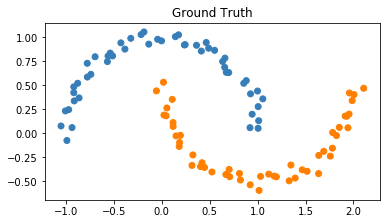

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create toy datasets for cluster experiments
n_samples = 100
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
datasets = [noisy_circles, noisy_moons]

X, y = datasets[1]

def plot_results(X, y, fignum, title):
    # plot with true labels
    fig = plt.figure(fignum)
    plt.title(title)
    colors = ['#377eb8', '#ff7f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    plt.gca().set_aspect('equal')
    plt.show()
    
plot_results(X, y, 1, "Ground Truth")

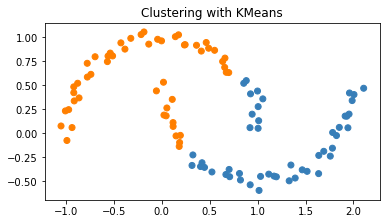

In [2]:
from sklearn.cluster import KMeans

# try clustering with KMeans for comparision
km = KMeans(n_clusters=2)
km.fit(X)
y_pred = km.labels_

# plot results
plot_results(X, y_pred, 2, "Clustering with KMeans")

In [3]:
from numpy.linalg import norm
from math import exp

num_clusters = 2
sigma_sq = .03

def affinity_kernel(x1, x2):
    # compute the affinity of samples X1, X2
    return exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A = np.zeros((len(X), len(X)))
for i in range(len(X)-1):
    for j in range(i+1, len(X)):
        A[i,j] = affinity_kernel(X[i], X[j])
        A[j,i] = A[i,j]

# print affinity matrix
np.set_printoptions(precision=3)
print(A)

[[  0.000e+00   6.270e-16   1.454e-13 ...,   1.566e-15   7.021e-16
    3.877e-12]
 [  6.270e-16   0.000e+00   1.446e-02 ...,   4.594e-01   8.251e-56
    2.215e-14]
 [  1.454e-13   1.446e-02   0.000e+00 ...,   3.136e-04   1.205e-55
    3.958e-21]
 ..., 
 [  1.566e-15   4.594e-01   3.136e-04 ...,   0.000e+00   3.178e-52
    6.353e-11]
 [  7.021e-16   8.251e-56   1.205e-55 ...,   3.178e-52   0.000e+00
    1.506e-24]
 [  3.877e-12   2.215e-14   3.958e-21 ...,   6.353e-11   1.506e-24
    0.000e+00]]


In [4]:
# Construct diagonal degree matrix
D = np.zeros(A.shape)
for i in range(A.shape[0]):
    D[i,i] = np.sum(A[i,:])

print(D)

[[ 4.999  0.     0.    ...,  0.     0.     0.   ]
 [ 0.     5.841  0.    ...,  0.     0.     0.   ]
 [ 0.     0.     1.827 ...,  0.     0.     0.   ]
 ..., 
 [ 0.     0.     0.    ...,  5.576  0.     0.   ]
 [ 0.     0.     0.    ...,  0.     4.748  0.   ]
 [ 0.     0.     0.    ...,  0.     0.     6.159]]


In [5]:
# Construct Laplacian Matrix:
#   L = D^{-1/2} A D^{-1/2} --> L[i,j] = -A[i,j]/sqrt(d_i * d_j)

# D^{-1/2}:
Dinvsq = np.sqrt(np.linalg.inv(D))

L = np.dot(Dinvsq, A)
L = np.dot(L, Dinvsq)
#L = np.identity(len(A)) - L

print(L)
print(np.isclose(L[0,1], -A[0,1]/np.sqrt(D[1,1]*D[0,0])))

[[  0.000e+00   1.160e-16   4.813e-14 ...,   2.966e-16   1.441e-16
    6.988e-13]
 [  1.160e-16   0.000e+00   4.426e-03 ...,   8.050e-02   1.567e-56
    3.693e-15]
 [  4.813e-14   4.426e-03   0.000e+00 ...,   9.826e-05   4.092e-56
    1.180e-21]
 ..., 
 [  2.966e-16   8.050e-02   9.826e-05 ...,   0.000e+00   6.178e-53
    1.084e-11]
 [  1.441e-16   1.567e-56   4.092e-56 ...,   6.178e-53   0.000e+00
    2.784e-25]
 [  6.988e-13   3.693e-15   1.180e-21 ...,   1.084e-11   2.784e-25
    0.000e+00]]
True


In [6]:
# Find the K largest eigenvectors of L
eigvals, eigvects = np.linalg.eigh(L)

best_eigens = []
for i in range(L.shape[0]-1,0,-1):
    #if np.isclose(eigvals[i], 1):
    if 0:
        continue
    else:
        if len(best_eigens) == num_clusters:
            break
        else:
            best_eigens.append(i)
print(best_eigens)

# TODO: verify not 1, and verify orthogonal
LX = np.zeros((L.shape[0],num_clusters))
for i in range(num_clusters):
    LX[:,i] = eigvects[:,best_eigens[i]]
# normalize new eigenvector-column-matrix
for row in range(len(LX)):
    LX[row,:] = LX[row,:] / np.linalg.norm(LX[row,:])
print(LX)

# verify: L v = \lamda v
print("Eigenvalues:")
print(eigvals)
print("Verify an eigenvector + eigenvalue")
print(np.isclose(np.dot(L,eigvects[:,1]), eigvals[1]*eigvects[:,1]))

[99, 98]
[[ 0.771 -0.637]
 [ 0.642  0.767]
 [ 0.636  0.772]
 [ 0.746  0.666]
 [ 0.734  0.679]
 [ 0.797 -0.604]
 [ 0.617 -0.787]
 [ 0.641  0.767]
 [ 0.618 -0.786]
 [ 0.809 -0.588]
 [ 0.692  0.722]
 [ 0.734 -0.679]
 [ 0.819  0.574]
 [ 0.743 -0.669]
 [ 0.725  0.688]
 [ 0.617 -0.787]
 [ 0.62  -0.785]
 [ 0.744 -0.669]
 [ 0.778 -0.628]
 [ 0.778  0.628]
 [ 0.636  0.771]
 [ 0.645  0.764]
 [ 0.62  -0.784]
 [ 0.658 -0.753]
 [ 0.753  0.658]
 [ 0.733  0.681]
 [ 0.681  0.732]
 [ 0.74   0.672]
 [ 0.721  0.693]
 [ 0.832 -0.555]
 [ 0.703  0.711]
 [ 0.639  0.77 ]
 [ 0.678 -0.735]
 [ 0.646 -0.763]
 [ 0.885 -0.465]
 [ 0.656  0.755]
 [ 0.662  0.75 ]
 [ 0.684 -0.729]
 [ 0.759  0.651]
 [ 0.745  0.667]
 [ 0.76   0.649]
 [ 0.64   0.768]
 [ 0.765 -0.644]
 [ 0.801 -0.599]
 [ 0.706  0.709]
 [ 0.754 -0.656]
 [ 0.666  0.746]
 [ 0.668  0.744]
 [ 0.713 -0.701]
 [ 0.666 -0.746]
 [ 0.67   0.742]
 [ 0.822 -0.569]
 [ 0.627 -0.779]
 [ 0.744  0.668]
 [ 0.671  0.741]
 [ 0.617 -0.787]
 [ 0.73  -0.683]
 [ 0.641 -0.768]
 [ 0.

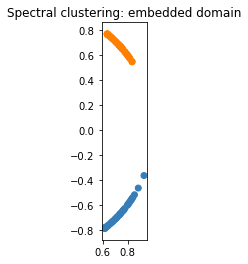

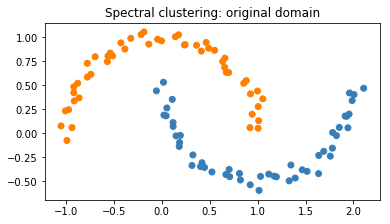

In [7]:
# Finally, do clustering on reduced space using KMeans:
km2 = KMeans(n_clusters=2, n_init=20)
km2.fit(LX)
y_pred = km2.labels_

# plot results
plot_results(LX, y_pred, 3, "Spectral clustering: embedded domain")
plot_results(X, y_pred, 3, "Spectral clustering: original domain")